<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/Arima%5Bts%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



In [64]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/air_passengers.csv' , index_col='Month' , parse_dates=True)
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [65]:
df.isna().sum()

,0
Passengers,0


In [66]:
df.index.freq='MS'

In [67]:
df.shape

(144, 1)

<Axes: xlabel='Month'>

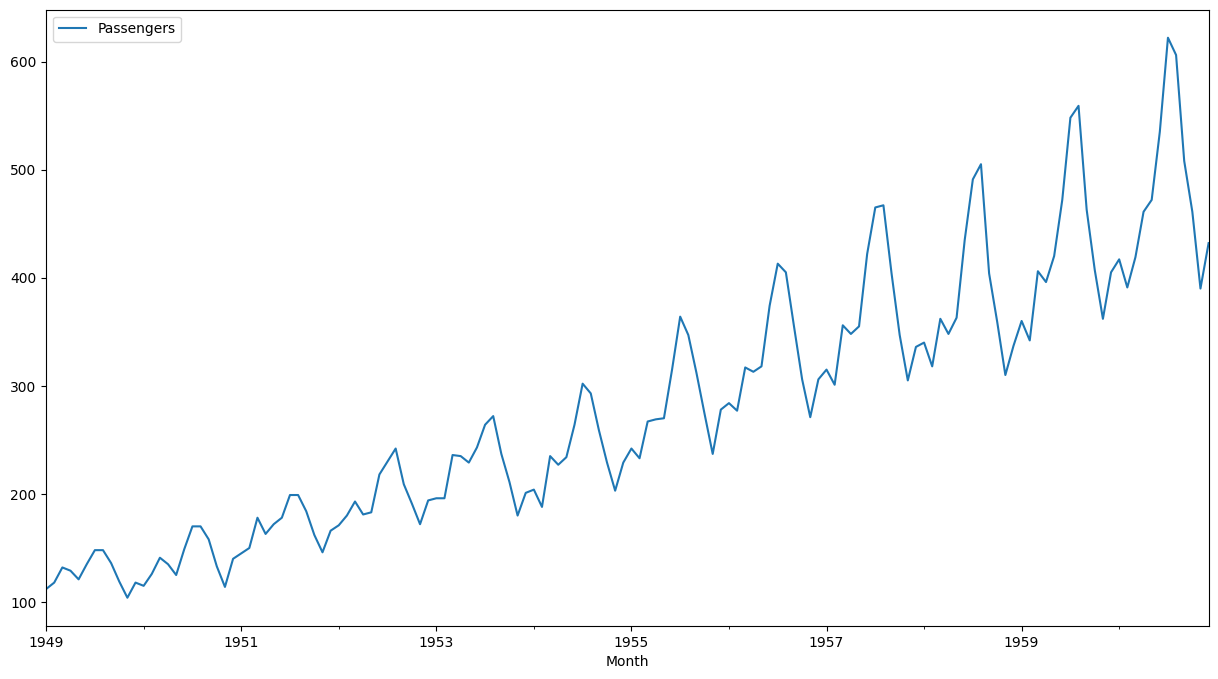

In [68]:
df.plot(figsize=(15,8))

In [69]:
df['1stdiff']=df['Passengers'].diff()

<Axes: xlabel='Month'>

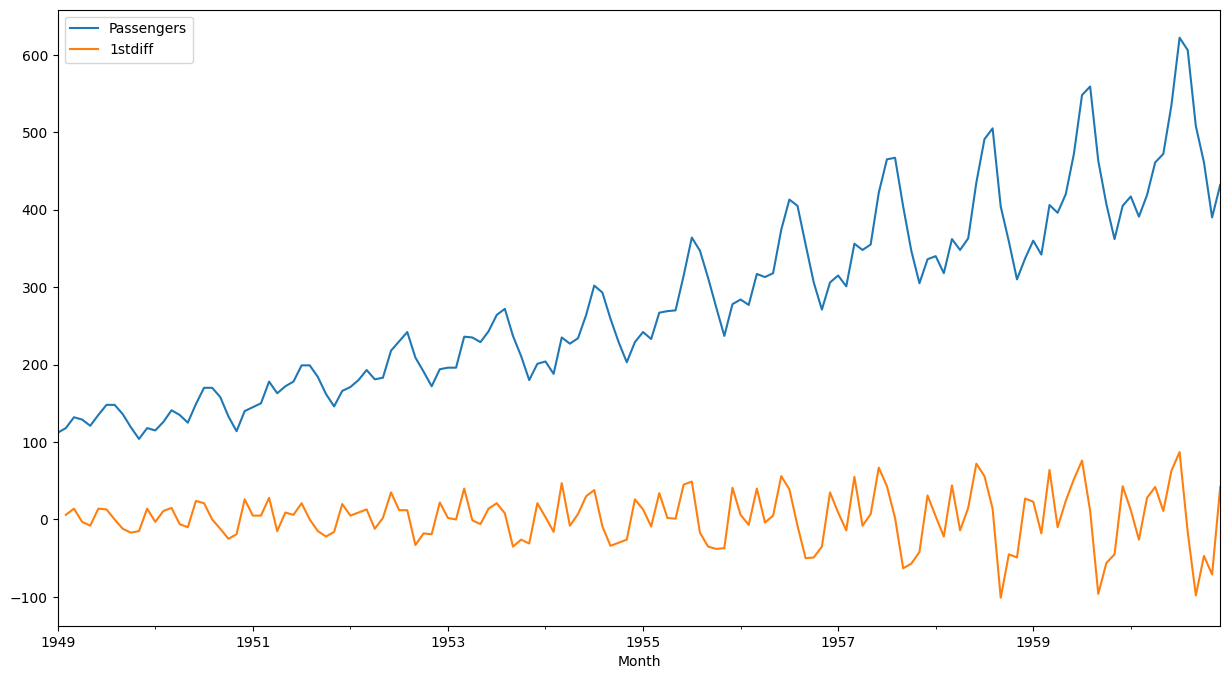

In [70]:
df.plot(figsize=(15,8))

In [71]:
df['LogPassengers']=np.log(df['Passengers'])

<Axes: xlabel='Month'>

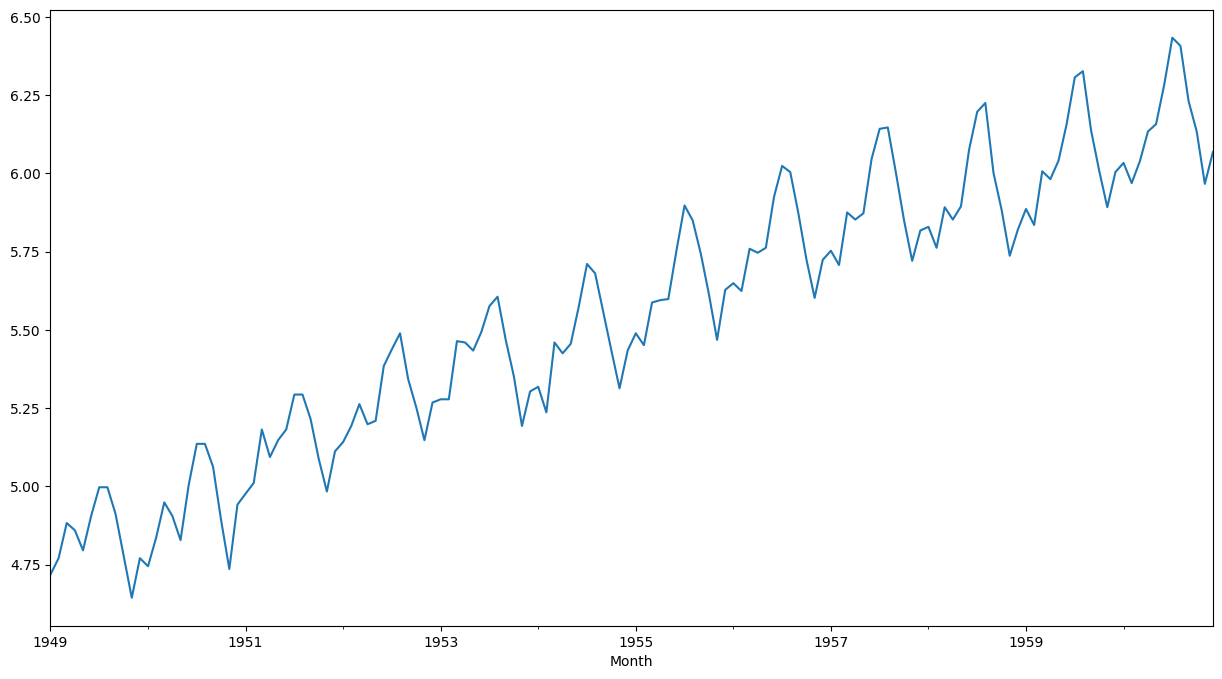

In [72]:
df['LogPassengers'].plot(figsize=(15,8))

In [73]:
from statsmodels.tsa.arima.model import ARIMA

In [74]:
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [75]:
#bollean series
train_idx=df.index<=train.index[-1]
test_idx=df.index > train.index[-1]

In [76]:
arima=ARIMA(train['Passengers'], order=(1,0,0))

In [77]:
arima_result=arima.fit()

In [78]:
df.loc[train_idx, 'AR(1)']=arima_result.predict(start=train.index[0],end=train.index[-1])

<Axes: xlabel='Month'>

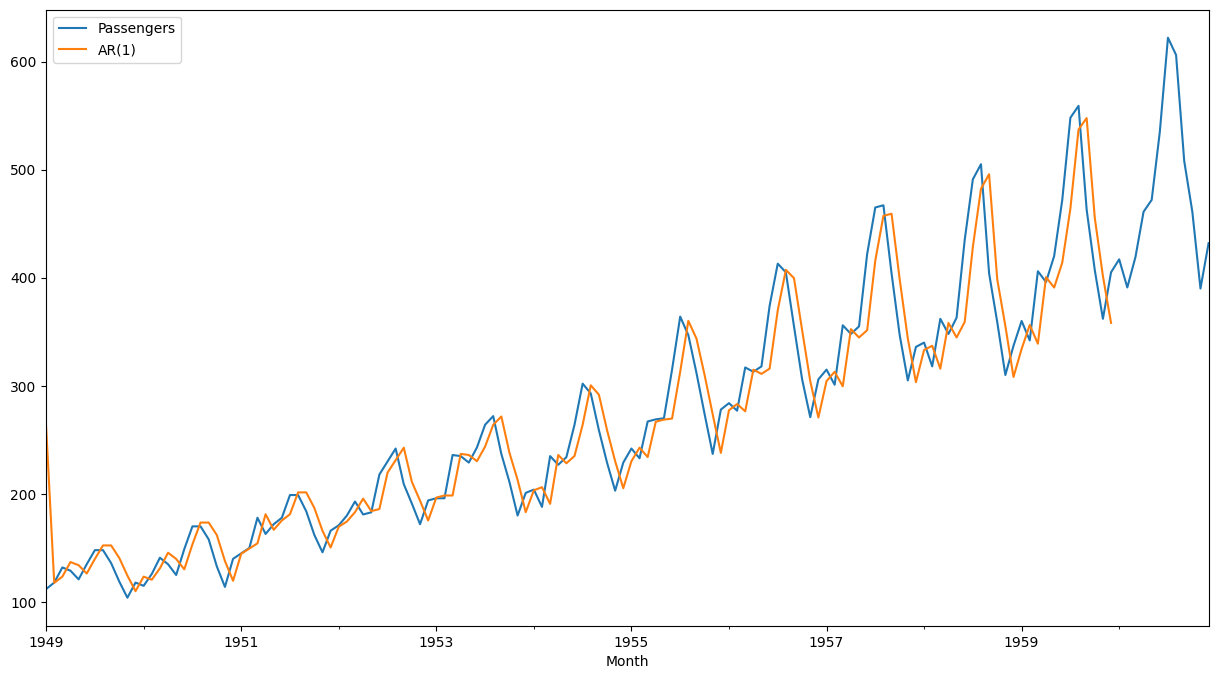

In [79]:
df[['Passengers','AR(1)' ]].plot(figsize=(15,8))

In [80]:
prediction_result=arima_result.get_forecast(Ntest)
forecast=prediction_result.predicted_mean

In [81]:
df.loc[test_idx, 'AR(1)']=forecast

<Axes: xlabel='Month'>

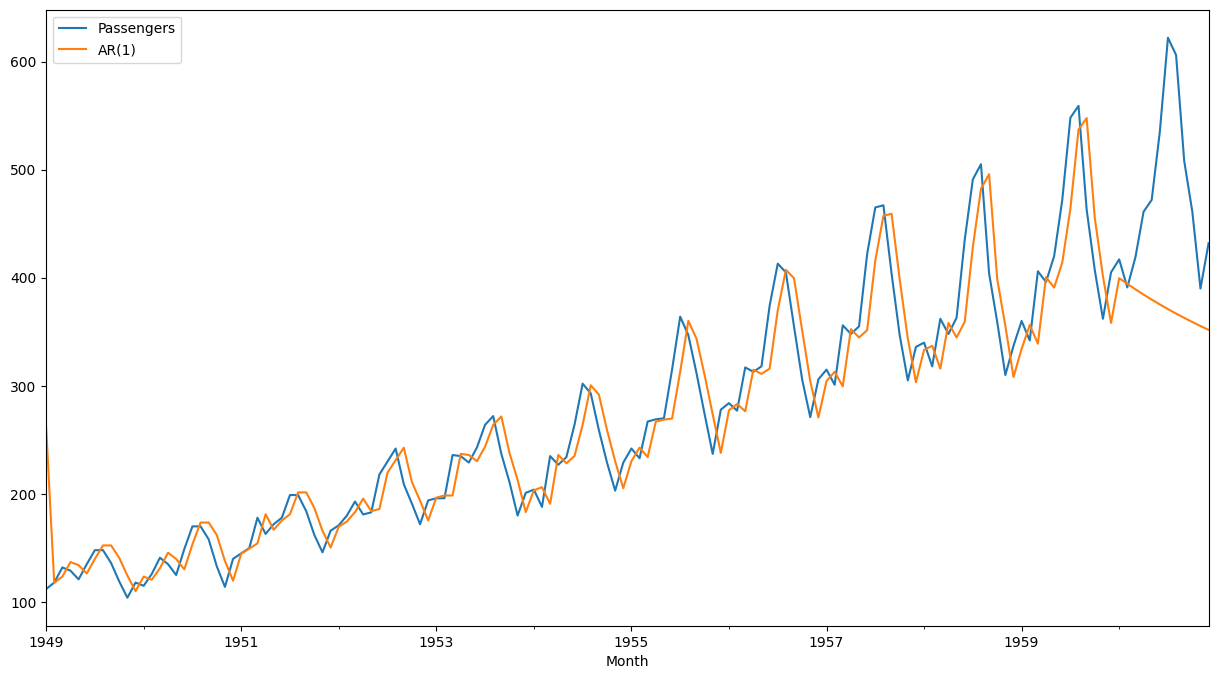

In [82]:
df[['Passengers','AR(1)' ]].plot(figsize=(15,8))

In [83]:
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [84]:
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [85]:


def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(15, 5))


    ax.plot(df['Passengers'], label='data')

    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()

    lower = conf_int['lower Passengers']
    upper = conf_int['upper Passengers']
    forecast = prediction_result.predicted_mean

    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, lower, upper, color='pink', alpha=0.3)

    ax.legend()
    plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


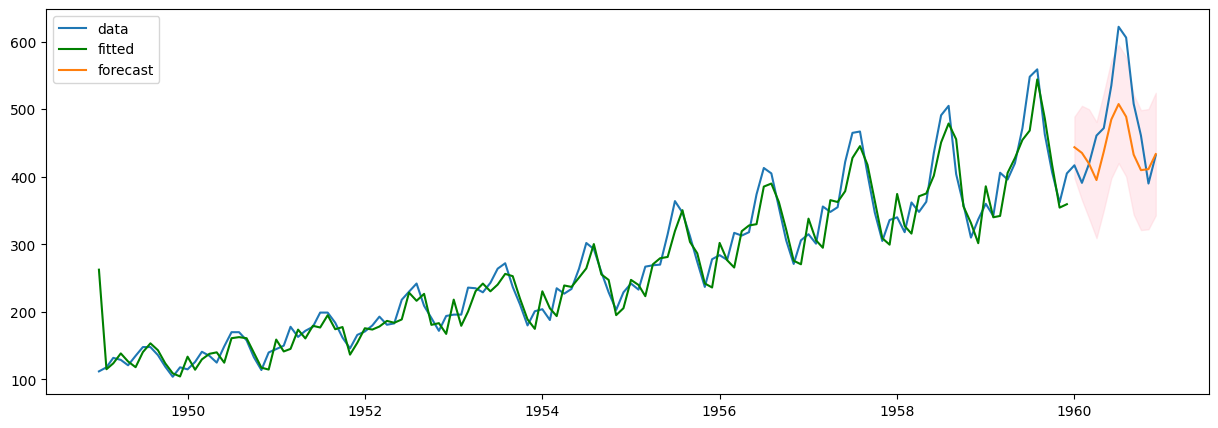

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


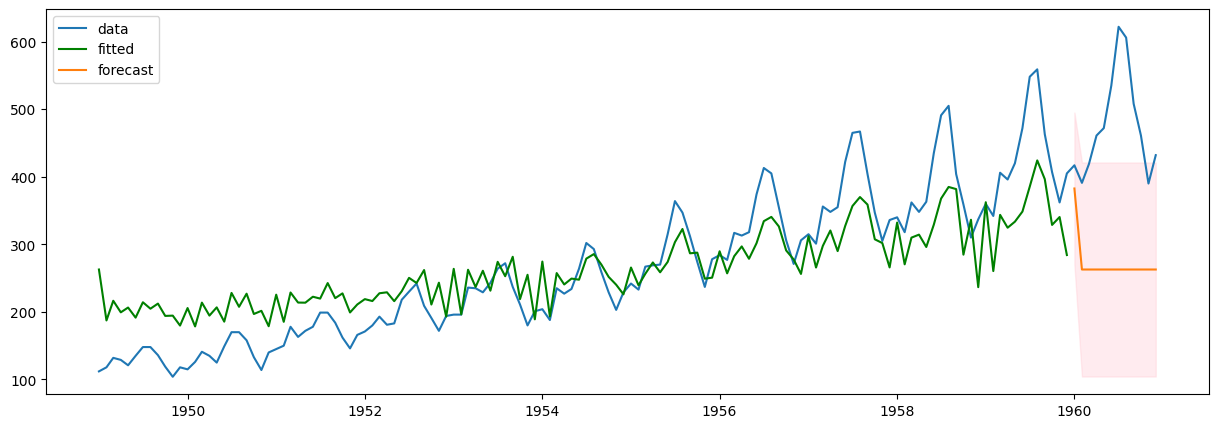

In [86]:
from statsmodels.tsa.arima.model import ARIMA


arima = ARIMA(train['Passengers'], order=(10, 0, 0))  # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

arima = ARIMA(train['Passengers'], order=(0, 0, 1))  # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)


In [87]:
df['LogPassengers'] = np.log(df['Passengers'])

df['Log1stDiff'] = df['LogPassengers'].diff()

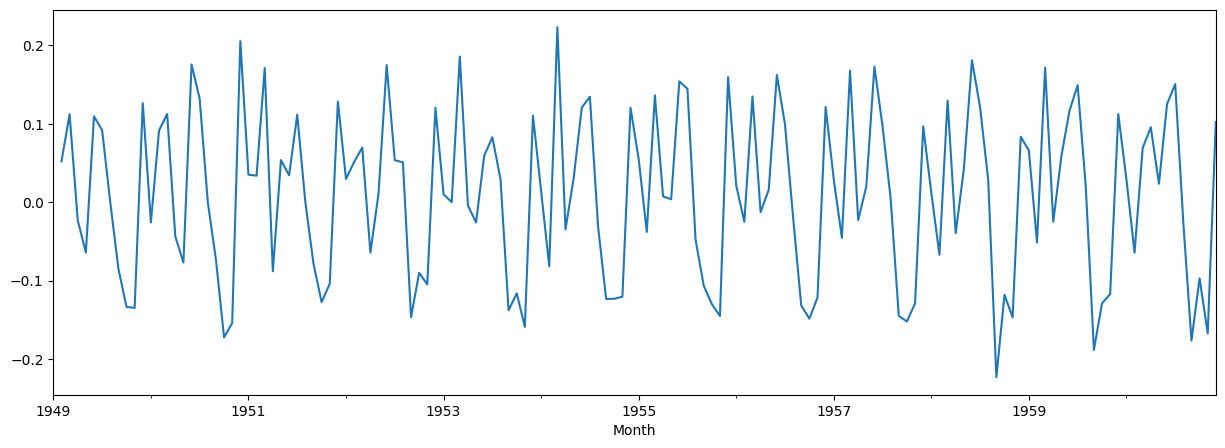

In [88]:
df['Log1stDiff'].plot(figsize=(15, 5))
plt.show()

In [89]:

arima = ARIMA(train['Passengers'], order=(8, 1, 1))
arima_result_811 = arima.fit()


In [90]:
def plot_fit_and_forecast_int(result, d, col='Passengers'):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df[col], label='data')
    # plot the curve fitted on train set
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    ax.plot(train.index[d:], train_pred, color='green', label='fitted')

    # forecast the test set
    prediction_result = result.get_forecast(Ntest)
    conf_int = prediction_result.conf_int()
    lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
    forecast = prediction_result.predicted_mean

    ax.plot(test.index, forecast, color='red', label='forecast')
    ax.fill_between(test.index, lower, upper, color='pink', alpha=0.3)

    ax.legend()
    plt.show()

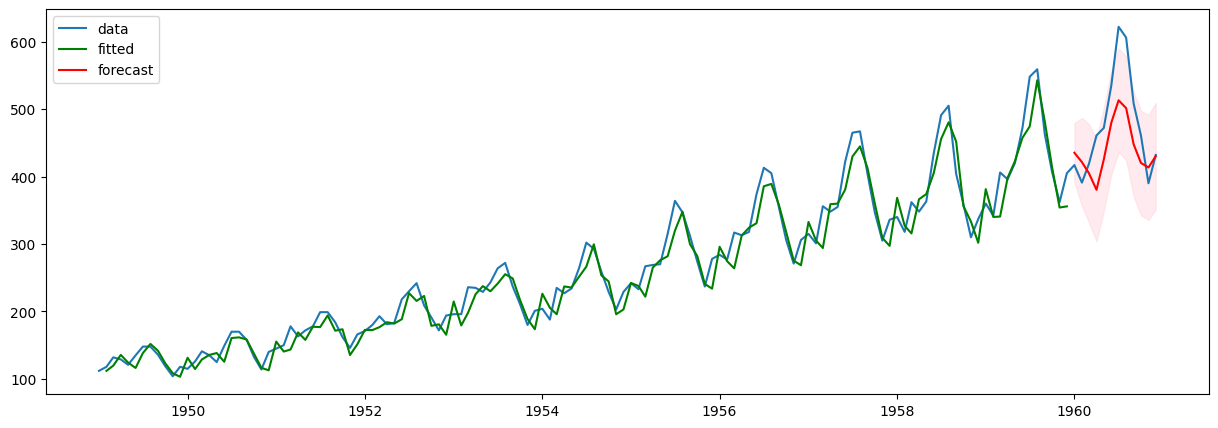

In [91]:
plot_fit_and_forecast_int(arima_result_811, d=1, col='Passengers')

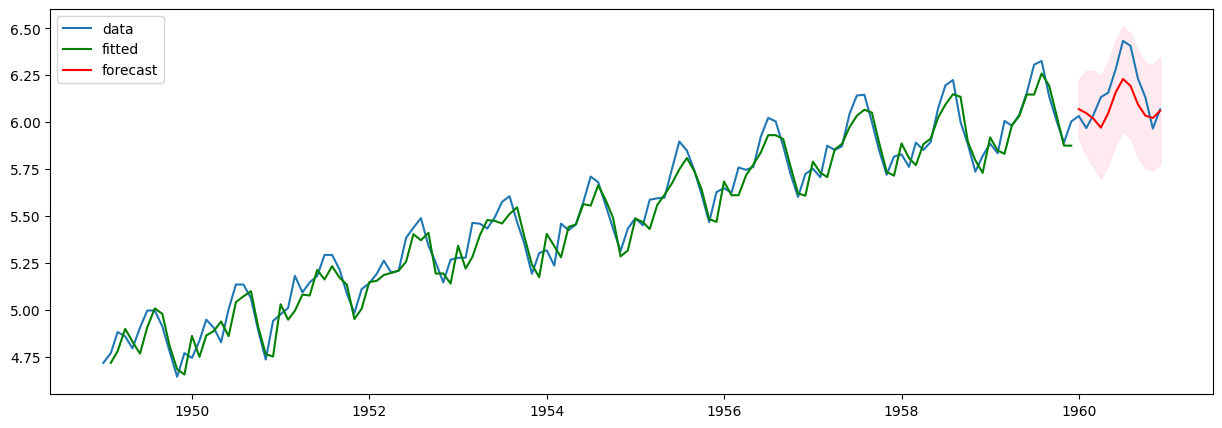

In [95]:
# 1) ARIMA on LogPassengers  (8,1,1)
arima = ARIMA(train['LogPassengers'].dropna(), order=(8,1,1))
res_log811 = arima.fit()
plot_fit_and_forecast_int(res_log811, 1, col='LogPassengers')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


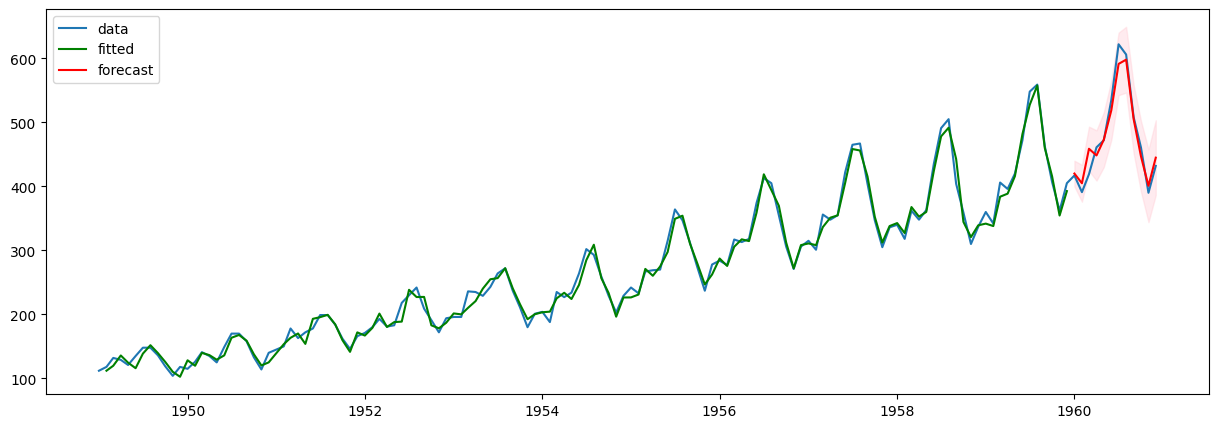

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


TypeError: plot_fit_and_forecast_int() got multiple values for argument 'col'

In [96]:

# 2) ARIMA  on Passengers  (12,1,0)
arima = ARIMA(train['Passengers'].dropna(), order=(12,1,0))
res_1210 = arima.fit()
plot_fit_and_forecast_int(res_1210, 1, col='Passengers')



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


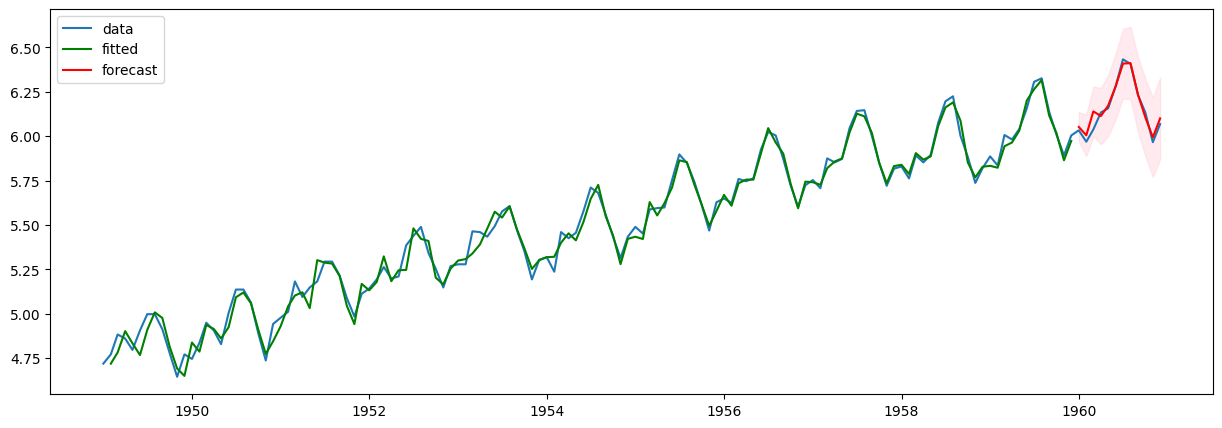

In [98]:
# 3) ARIMA  on LogPassengers  (12,1,0)
arima = ARIMA(train['LogPassengers'].dropna(), order=(12,1,0))
res_log1210 = arima.fit()
plot_fit_and_forecast_int(res_log1210, 1, col='LogPassengers')

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
def score_forecast(result,is_logged):
    #
    forecast = result.forecast(Ntest)
    if is_logged:

      forecast = np.exp(forecast)
    y_true = test['Passengers']
    y_hat  = forecast
    # rmse = mean_squared_error(y_true, y_hat, squared=False)
    # r2 = r2_score(y_true, y_hat)
    return np.sqrt(np.mean((y_hat-y_true)**2))

In [112]:
print("Log(8,1,1) ->", score_forecast(res_log811 , False ))
print("Raw(12,1,0) ->", score_forecast(res_1210, True))
print("Log(12,1,0) ->", score_forecast(res_log1210, True))

Log(8,1,1) -> 475.93298315729083
Raw(12,1,0) -> inf
Log(12,1,0) -> 16.107448748925506


In [113]:
np.isfinite(forecast).all()

np.True_